In [1]:
#alternate-multiclass-classifieripynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#27 January 2018

In [2]:
#this was adapted from https://www.kaggle.com/akashdeepjassal/keras-classifier
import time
t_start = time.time()

In [3]:
#get the iris data
import os
os.system('rm -rf iris.data')
os.system('wget archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

0

In [4]:
#imports
import numpy
import pandas
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#KerasClassifierfrom keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline

#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [5]:
#initialize random number
seed = 7
numpy.random.seed(seed)

In [6]:
#load data
df = pandas.read_csv("iris.data", header=None)
print df[4].unique()
df['species'] = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df = df.drop([4], axis=1)
print df['species'].unique()
df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


,0,1,2,3,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#generate test-train split
test_fraction = 0.5
x_cols = [0, 1, 2, 3]
y_col = 'species'
train, test = train_test_split(df, test_size=test_fraction, random_state=14)
X_train = train[x_cols].values
y_train = train['species'].values
y_train = np_utils.to_categorical(y_train)
X_test = test[x_cols].values
y_test = test['species'].values
y_test = np_utils.to_categorical(y_test)
print 'X_train.shape = ', X_train.shape
print 'y_train.shape = ', y_train.shape
print X_train[0:3]
print y_train[0:3]

X_train.shape =  (75, 4)
y_train.shape =  (75, 3)
[[ 5.   3.2  1.2  0.2]
 [ 5.3  3.7  1.5  0.2]
 [ 6.2  2.8  4.8  1.8]]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


In [8]:
#build model
nb_classes = 3
model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#fit model to training data
nb_epoch = 100
batch_size = 10
loss_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, 
    nb_epoch=nb_epoch, verbose=0)

/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


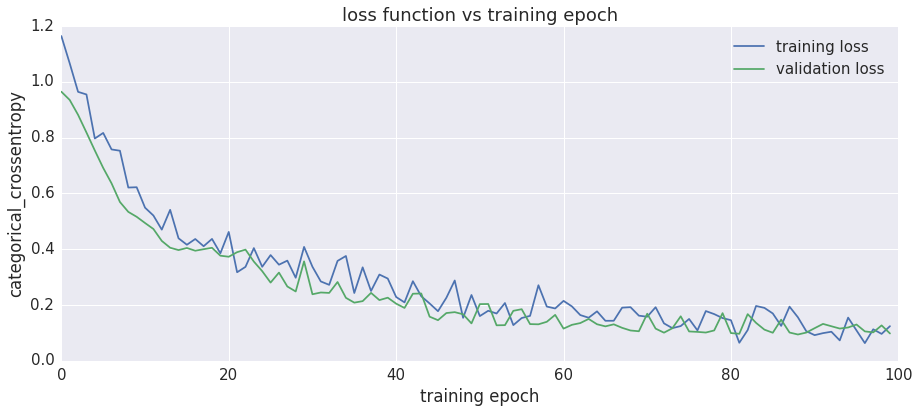

In [10]:
#plot loss function vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.plot(loss_history.epoch, loss_history.history['loss'], label='training loss')
ax.plot(loss_history.epoch, loss_history.history['val_loss'], label='validation loss')
ax.set_title('loss function vs training epoch')
ax.set_ylabel('categorical_crossentropy')
ax.set_xlabel('training epoch')
ax.legend()

In [11]:
#generate predicted y_test = ethereum's fractional next-day gain
y_test_pred = pandas.DataFrame(model.predict(X_test))
y_test_pred.columns = [str(col)+'_pred' for col in y_test_pred.columns]
for j in range(3):
   y_test_pred[j] = y_test[:,j]
print X_test.shape, y_test.shape
y_test_pred.head()

(75, 4) (75, 3)


,0_pred,1_pred,2_pred,0,1,2
0,0.999960,0.000040,1.740901e-08,1.0,0.0,0.0
1,0.999986,0.000014,4.101899e-09,1.0,0.0,0.0
2,0.999991,0.000009,2.043708e-09,1.0,0.0,0.0
3,0.001965,0.952201,4.583409e-02,0.0,1.0,0.0
4,0.000001,0.003196,9.968026e-01,0.0,0.0,1.0


In [12]:
#evaluate model accurace on test data
score = model.evaluate(X_test, y_test)
print '\naccuracy = ', score[1]

32/75 [===========>..................] - ETA: 0s
accuracy =  0.973333341281
